# **Introduction **

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.
The dataset is available on Kaggle as a part of their legendary Titanic ML competition. The dataset is available from the below link:

https://www.kaggle.com/c/titanic/data

# **Data Dictionary **

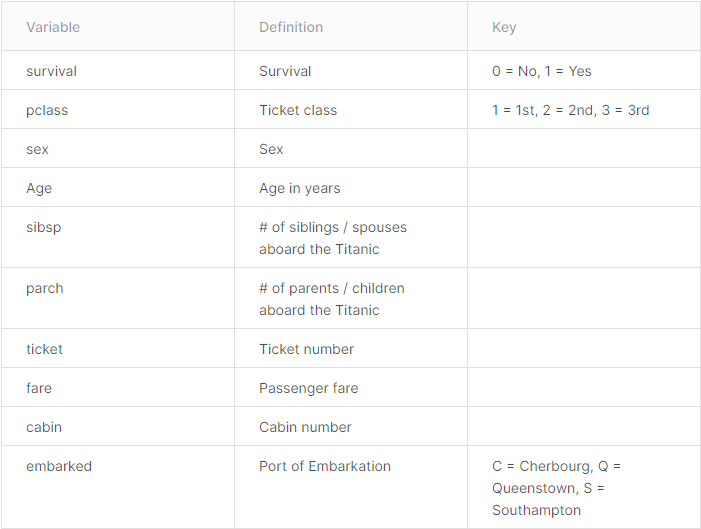

# **Model Training Plan**
* Step 1 - Import Dataset 
* Step 2 - Explore the Data 
* Step 3 - Create Pipelines 
* Step 4 - Train Random Forest Classifier 
* Step 5 - Evaluate SVM model 
* Step 6 - Train Random Forest 





In [ ]:
import os 

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
from sklearn.base import BaseEstimator
# BaseEstimator help in implementing a git mothod to learn from data 
from sklearn.base import TransformerMixin
# It help in fit to data and then transform it 

In [ ]:
# fit to data then transform it 
class DataFrameSelector(BaseEstimator , TransformerMixin):
  def __init__(self,attribute_names):
    self.attribute_names = attribute_names
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X[self.attribute_names]

In [ ]:
from sklearn.pipeline import Pipeline 
# The sklearn.pipeline module implements utilities to build a composite estimator, as a chain of transforms and estimators.
from sklearn.impute import SimpleImputer
# Imputation transformer for completing missing values.
# Create the pipeline and save it in a variable named num_pipeline

num_pipeline = Pipeline([
                         ("select_numeric",DataFrameSelector(["Age","SibSp","Parch","Fare"])),
                         ("imputer",SimpleImputer(strategy="median")),
])

In [ ]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [ ]:
class MostFrequentImputer (BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index = X.columns)
    return self
  
  def transform(self, X, y=None):
    return X.fillna(self.most_frequent_)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

cat_pipeline = Pipeline([
                         ("select_cat", DataFrameSelector(["Pclass","Sex","Embarked"])),
                         ("imputer", MostFrequentImputer()),
                         ("cat_encoder", OneHotEncoder(sparse = False)),
])

cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list = [
                                                       ("num_pipeline",num_pipeline),
                                                       ("cat_pipeline",cat_pipeline),
])

In [ ]:
X_train = preprocess_pipeline.fit_transform(train_data)


In [ ]:
y_train = train_data["Survived"]

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC(gamma = "auto" , random_state=42)
svm_clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Use the model to predict the test data. First you need to pass the test data through the pipeline and store it in X_test, then predict it and store it in y_pred
X_test = preprocess_pipeline.transform(test_data)


In [ ]:
y_pred = svm_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
svm_scores = cross_val_score(svm_clf,X_train,y_train,cv=10)
svm_scores.mean()

0.7329588014981274

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_scores= cross_val_score(forest_clf, X_train, y_train, cv = 10)
forest_scores.mean()

0.8126466916354558

In [ ]:
print(forest_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
